# Samplings using Bootstrap technique 

In [ ]:
# packes
import numpy  as np

from VMCM.samplings import Samplings


In [5]:
# Here starts the main program with variable declarations
Number_particles = 1
Dimension = 3
Number_MC_cycles = 10**3

alpha = 0.5000025256 # It was calulated using gradient descent algorithm 

# Number core
Number_core = 10

# Number samplings
Number_samplings = 10**5

# Type algorithm
algorithm = 'MetropolisHastings'

# Type of calculation
Type_calculations_analytic = 'analytic'

# Instantce class algorithm
samplings =  Samplings(Number_particles, Dimension, algorithm, Type_calculations_analytic, alpha, Number_MC_cycles) 

# Setting algorithm
Energies, Variances, errors, Time_consuming = samplings.samplings(Number_samplings,Number_core)


/home/luis/.local/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


# Statistic analysis

In [6]:
from VMCM.StatisticalTechniques.StatisticalTechniques import StatisticalTechniques

# Here starts the main program with variable declarations
Data = Energies
NumberResampling = 10**6

# Instantce class StatisticalTechniques
Statistic = StatisticalTechniques()

Bootstrap_output = Statistic.bootstrap(Data,NumberResampling)

Time consuming: 1551.01 sec
Original: 
Mean value     Variance   Error
         1.5     8.49689e-07     2.91494e-06
After Bootstrap technique: 
Mean value     Variance   Error
         1.5     2.68573e-09      5.1824e-08


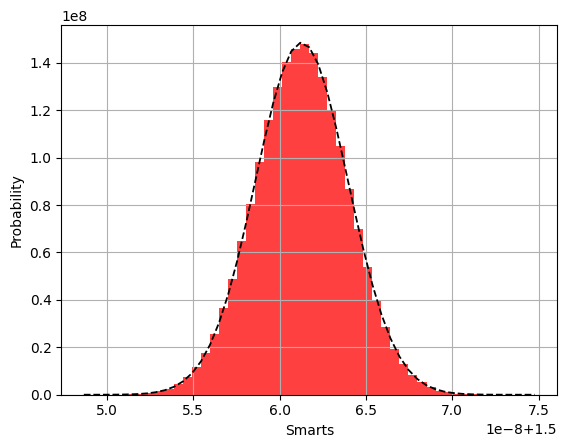

In [7]:
# Packes
from scipy.stats import norm
import matplotlib.pyplot as plt

from VMCM.utils.PathSaveOutput import SaveOutput

# Instantiation SaveOutput 
save = SaveOutput('Result-part-e') 

# The histogram of the Bootstrap                                             
n, binsboot, patches = plt.hist(Bootstrap_output, bins=50, density='true',histtype='bar', color='red', alpha=0.75)

# add a 'best fit' line                                                                                                                                                          
y = norm.pdf( binsboot, np.mean(Bootstrap_output), np.std(Bootstrap_output))
TrenLine = plt.plot(binsboot, y, 'k--', linewidth=1.3)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.grid(True)
plt.savefig(save.figure_path('Bootstrap-technique'+ str(Number_particles)+'p-'+ str(Dimension)+'D') + ".png", format='png')
plt.show()